In [1]:
import networkx as nx
import matplotlib.pyplot as plt

#Create a graph
G  = nx.Graph()

#Add edges to the graph
edges = [(1,2), (1,3), (2,3), (3,4), (4,5),(5,6),(6,7),(6,8)]
G.add_edges_from(edges)

#Find brigdes in the graph
bridges = list(nx.bridges(G))

#Output the bridges
print("Bridges in the graph:", bridges)

Bridges in the graph: [(3, 4), (4, 5), (5, 6), (6, 7), (6, 8)]


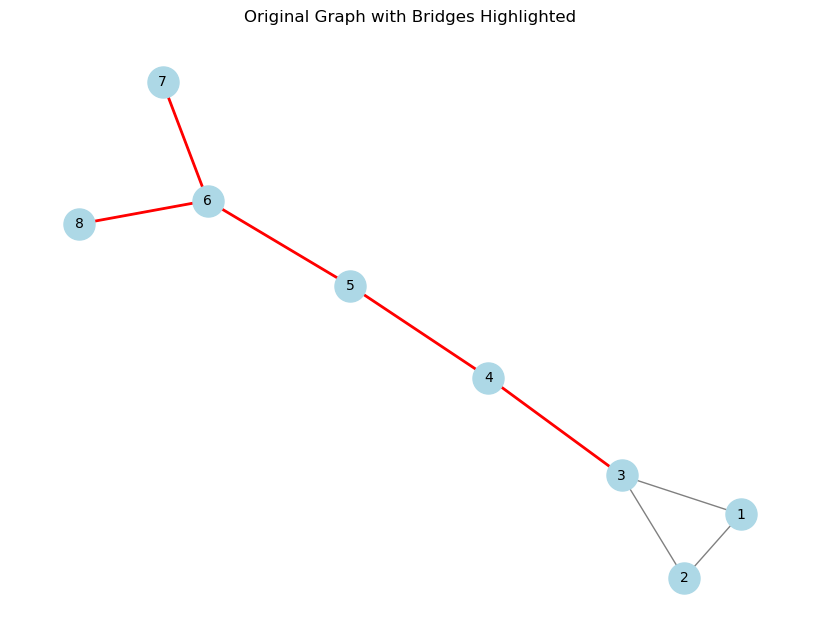

In [2]:
ego_node = 4

# Generate the ego network for the ego_node
ego_graph = nx.ego_graph(G, ego_node)

# Draw the original graph
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

# Highlight the bridges in red
nx.draw_networkx_edges(G, pos, edgelist=bridges, edge_color='red', width=2)

# Show the original graph with bridges highlighted
plt.title("Original Graph with Bridges Highlighted")
plt.show()

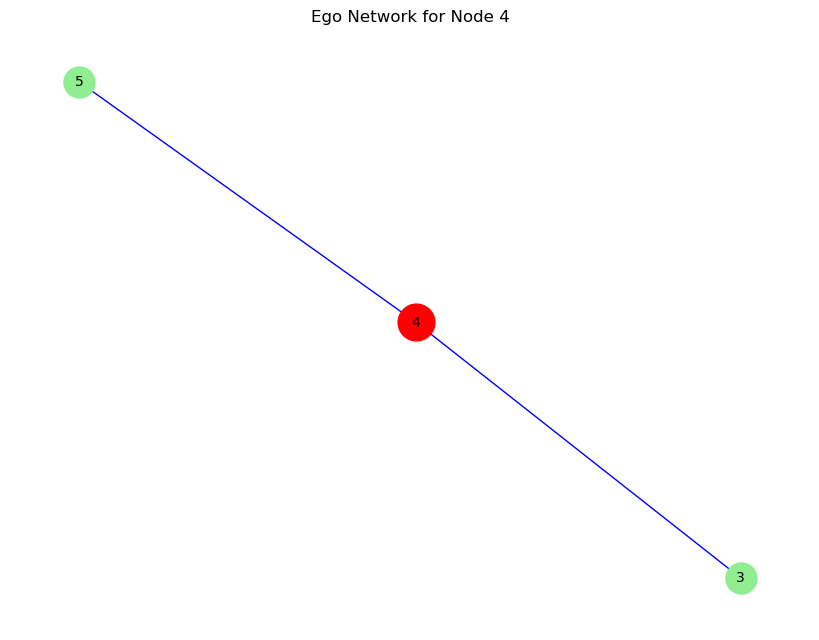

In [3]:
# Draw the ego network
plt.figure(figsize=(8, 6))
nx.draw(ego_graph, pos, with_labels=True, node_color='lightgreen', edge_color='blue', node_size=500, font_size=10)

# Highlight the ego node in red
nx.draw_networkx_nodes(ego_graph, pos, nodelist=[ego_node], node_color='red', node_size=700)

# Show the ego network
plt.title(f'Ego Network for Node {ego_node}')
plt.show()

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('us_edgelist.csv')
data.head()

,From,To
0,Clinton,Hillary
1,Bush,Laura
2,Obama,Michelle
3,Trump,Ivanka
4,Clinton,G.Bush


In [6]:
# Create a graph
G = nx.Graph()

In [8]:
# Add edges from dataset
edges = list(zip(data['From'], data['To']))
G.add_edges_from(edges)

In [9]:
# Identify nodes and edges
nodes = list(G.nodes())
edges = list(G.edges())
print("Nodes in the graph:", nodes)
print("Edges in the graph:", edges)

Nodes in the graph: ['Clinton', 'Hillary', 'Bush', 'Laura', 'Obama', 'Michelle', 'Trump', ' Ivanka', ' G.Bush ', 'Dole', 'Al Gore', 'Kerry', 'McCain', 'Romney', 'Bill', 'Ivanka', 'J. Thorn', 'T.Aitcheson', '\tCindy']
Edges in the graph: [('Clinton', 'Hillary'), ('Clinton', ' G.Bush '), ('Clinton', 'Dole'), ('Hillary', 'Trump'), ('Hillary', 'Laura'), ('Hillary', 'Michelle'), ('Bush', 'Laura'), ('Bush', 'Al Gore'), ('Bush', 'Kerry'), ('Bush', 'Bill'), ('Bush', 'Obama'), ('Laura', 'Michelle'), ('Obama', 'Michelle'), ('Obama', 'McCain'), ('Obama', 'Romney'), ('Obama', 'Trump'), ('Michelle', 'Ivanka'), ('Trump', ' Ivanka'), ('Al Gore', 'T.Aitcheson'), ('Kerry', 'J. Thorn'), ('McCain', '\tCindy')]


In [10]:
# Show graph info
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 19
Number of edges: 21


In [11]:
# Add a new edge not in the dataset
new_edge = ('Clinton', 'J. Thorn')
G.add_edge(*new_edge)

In [12]:
# Identify new nodes and edges
nodes = list(G.nodes())
edges = list(G.edges())
print("Updated Nodes in the graph:", nodes)
print("Updated Edges in the graph:", edges)

Updated Nodes in the graph: ['Clinton', 'Hillary', 'Bush', 'Laura', 'Obama', 'Michelle', 'Trump', ' Ivanka', ' G.Bush ', 'Dole', 'Al Gore', 'Kerry', 'McCain', 'Romney', 'Bill', 'Ivanka', 'J. Thorn', 'T.Aitcheson', '\tCindy']
Updated Edges in the graph: [('Clinton', 'Hillary'), ('Clinton', ' G.Bush '), ('Clinton', 'Dole'), ('Clinton', 'J. Thorn'), ('Hillary', 'Trump'), ('Hillary', 'Laura'), ('Hillary', 'Michelle'), ('Bush', 'Laura'), ('Bush', 'Al Gore'), ('Bush', 'Kerry'), ('Bush', 'Bill'), ('Bush', 'Obama'), ('Laura', 'Michelle'), ('Obama', 'Michelle'), ('Obama', 'McCain'), ('Obama', 'Romney'), ('Obama', 'Trump'), ('Michelle', 'Ivanka'), ('Trump', ' Ivanka'), ('Al Gore', 'T.Aitcheson'), ('Kerry', 'J. Thorn'), ('McCain', '\tCindy')]


C:\Users\star\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


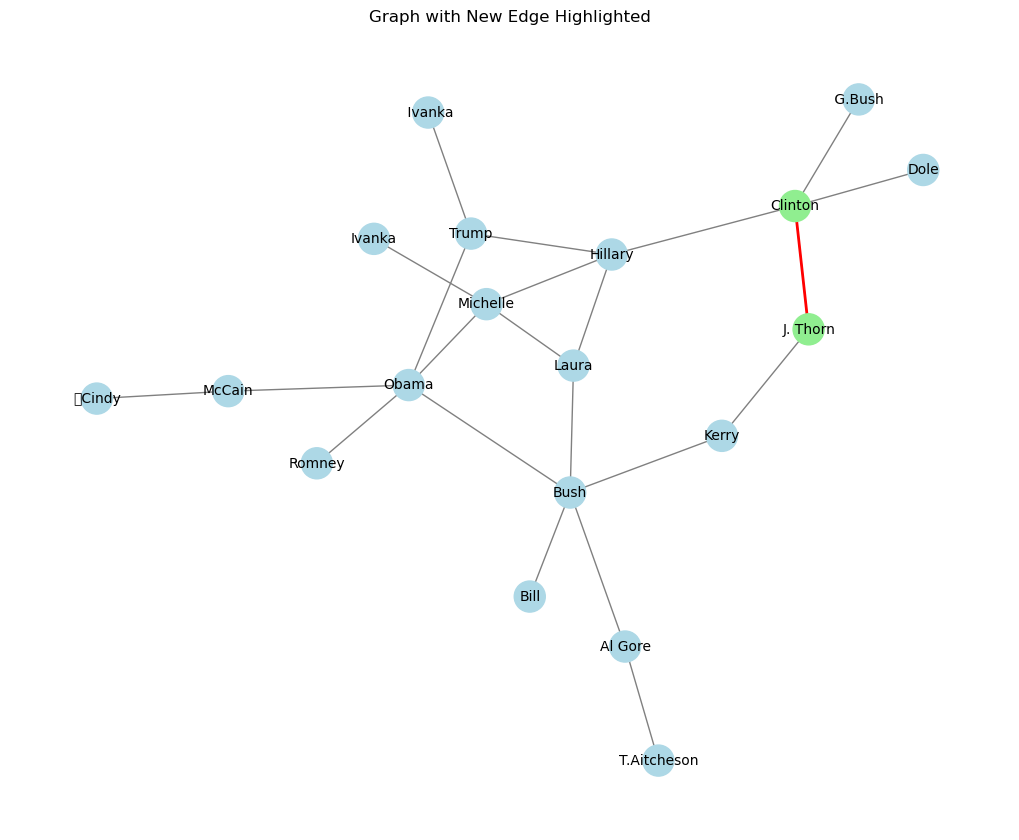

In [13]:
# Visualize the graph with labels
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color=['lightblue' if node not in new_edge else 'lightgreen' for node in G.nodes()],
        edge_color='gray', node_size=500, font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=[new_edge], edge_color='red', width=2)
plt.title("Graph with New Edge Highlighted")
plt.show()

In [14]:
# Add another edge to link the added edge with the rest of the graph
additional_edge = ('J. Thorn', 'Kerry')
G.add_edge(*additional_edge)

In [15]:
# Identify nodes and edges after adding the new edge
nodes = list(G.nodes())
edges = list(G.edges())
print("Nodes after adding additional edge:", nodes)
print("Edges after adding additional edge:", edges)

Nodes after adding additional edge: ['Clinton', 'Hillary', 'Bush', 'Laura', 'Obama', 'Michelle', 'Trump', ' Ivanka', ' G.Bush ', 'Dole', 'Al Gore', 'Kerry', 'McCain', 'Romney', 'Bill', 'Ivanka', 'J. Thorn', 'T.Aitcheson', '\tCindy']
Edges after adding additional edge: [('Clinton', 'Hillary'), ('Clinton', ' G.Bush '), ('Clinton', 'Dole'), ('Clinton', 'J. Thorn'), ('Hillary', 'Trump'), ('Hillary', 'Laura'), ('Hillary', 'Michelle'), ('Bush', 'Laura'), ('Bush', 'Al Gore'), ('Bush', 'Kerry'), ('Bush', 'Bill'), ('Bush', 'Obama'), ('Laura', 'Michelle'), ('Obama', 'Michelle'), ('Obama', 'McCain'), ('Obama', 'Romney'), ('Obama', 'Trump'), ('Michelle', 'Ivanka'), ('Trump', ' Ivanka'), ('Al Gore', 'T.Aitcheson'), ('Kerry', 'J. Thorn'), ('McCain', '\tCindy')]


In [16]:
# Show graph info
print("Number of nodes after additional edge:", G.number_of_nodes())
print("Number of edges after additional edge:", G.number_of_edges())

Number of nodes after additional edge: 19
Number of edges after additional edge: 22


C:\Users\star\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)


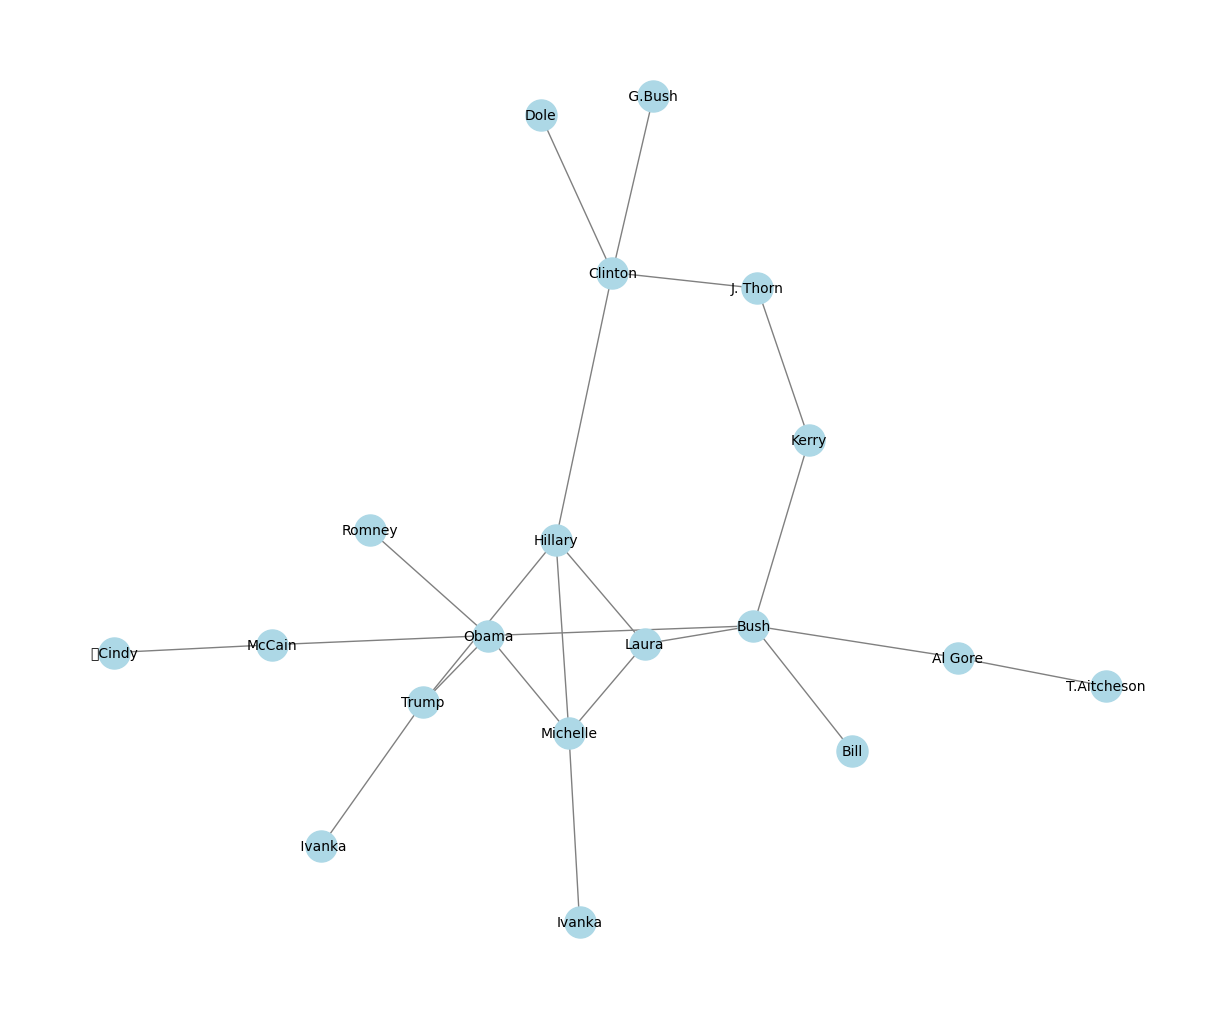

In [17]:
# Plot Graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

Bridges in the graph: [('Clinton', ' G.Bush '), ('Clinton', 'Dole'), ('Bush', 'Al Gore'), ('Bush', 'Bill'), ('Obama', 'McCain'), ('Obama', 'Romney'), ('Michelle', 'Ivanka'), ('Trump', ' Ivanka'), ('Al Gore', 'T.Aitcheson'), ('McCain', '\tCindy')]


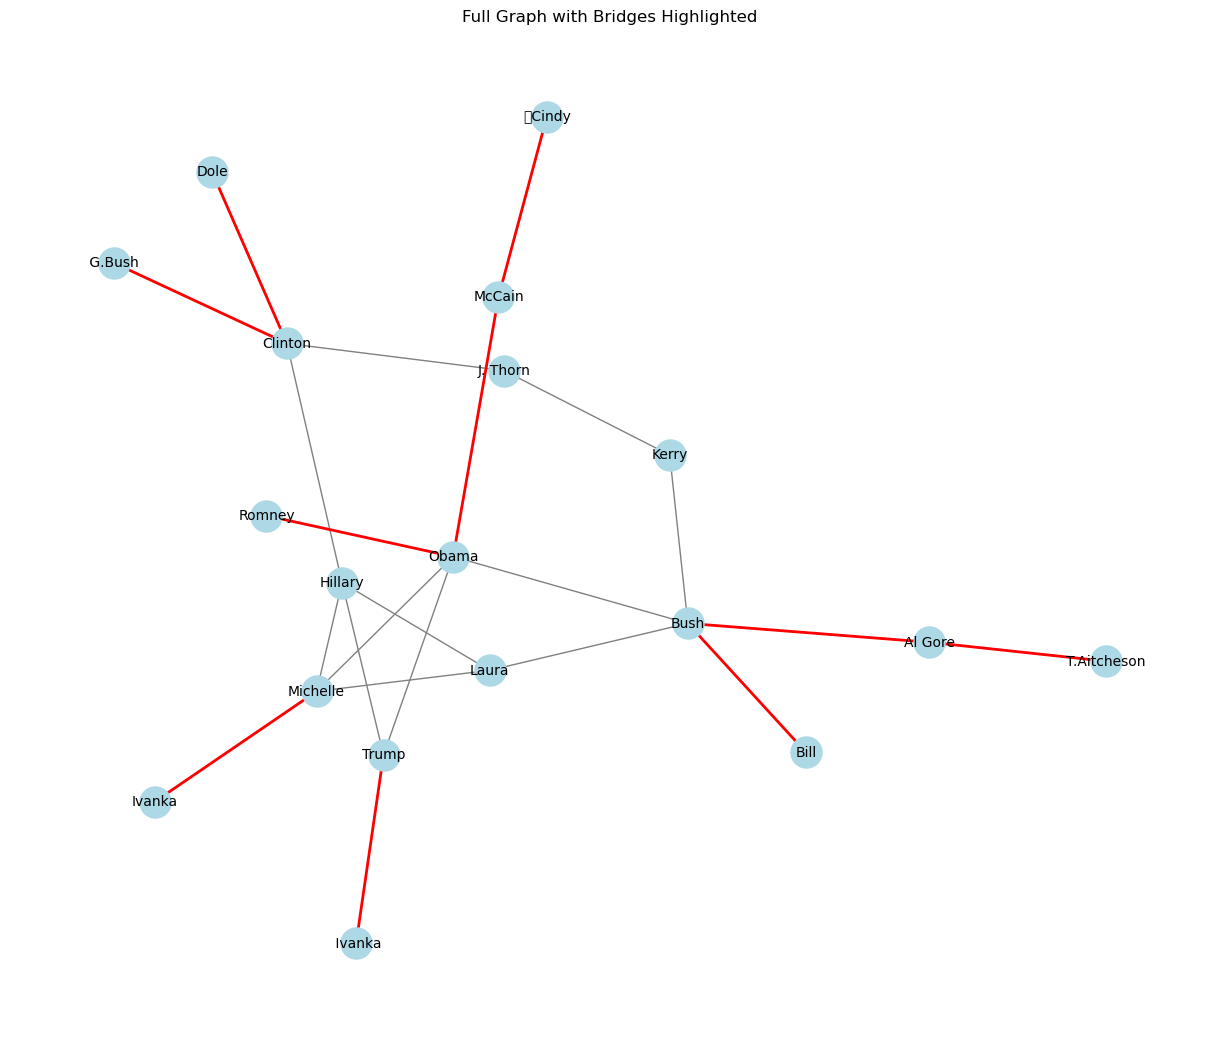

In [22]:
# Plot Graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)

# Draw the full graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

# Identify and plot bridges
bridges = list(nx.bridges(G))
print("Bridges in the graph:", bridges)

# Highlight bridges in red
nx.draw_networkx_edges(G, pos, edgelist=bridges, edge_color='red', width=2)

plt.title("Full Graph with Bridges Highlighted")
plt.show()